# Getting started

## Getting sample data
First we need to get some PIV sample data. Sample images can be downloaded using the package `pivtestdata`:

In [1]:
# !pip install pivtestdata

In [2]:
import pivtestdata as ptd

In [3]:
pc_1B = ptd.piv_challenge.pc_1B
pc_1B

PivChallenge(name=piv_challenge/1/B, nimg=12, url=https://www.pivchallenge.org/pub/B/B.zip)

In [4]:
sample_folder_pc_1B = pc_1B.download()
filenames = sorted(sample_folder_pc_1B.glob('*.tif*'))

## Working with PIV Images

In [5]:
import pivimage

Init a series of image pairs based on the above folder:

In [6]:
pimgs = pivimage.PIVImagePairs(filenames_A=filenames[::2], filenames_B=filenames[1::2])

### Address images

You can address A or B images or both together.

In [7]:
img_pair_3 = pimgs[3]

In [8]:
imgA0 = pimgs[3].A

In [9]:
imgB0 = pimgs[3].B

### Plotting

(<Axes: title={'center': 'A'}>, <Axes: >)

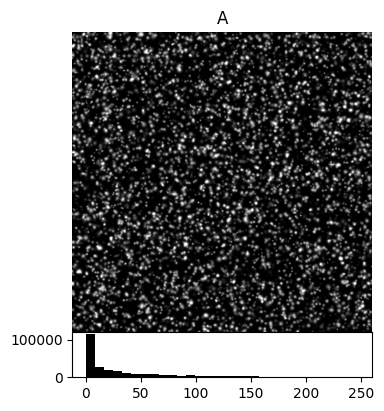

In [10]:
imgA0.plot(bins=30)

Without specifing `A` or `B`, both images are plotted:

(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

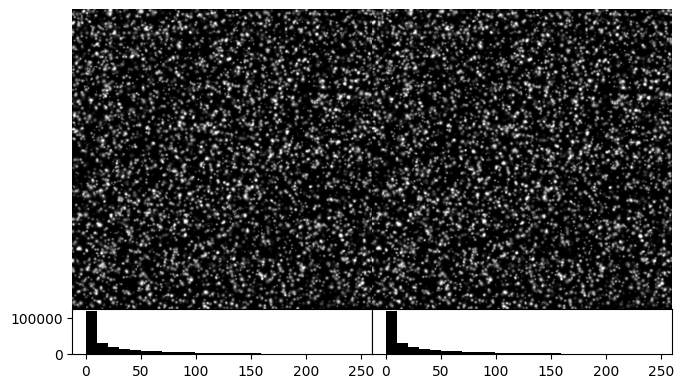

In [11]:
pimgs[3].plot(bins=25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: >

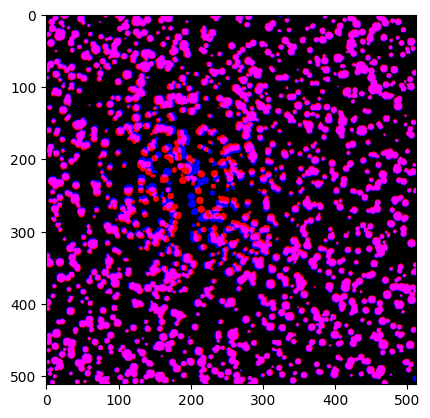

In [12]:
pimgs[-1].plot_overlay()

In [13]:
pimgs[-1]

### Mathematical operations

We can subtract both images:

In [14]:
img_dif = pimgs[-1].B-pimgs[1].A

(<Axes: >, <Axes: >)

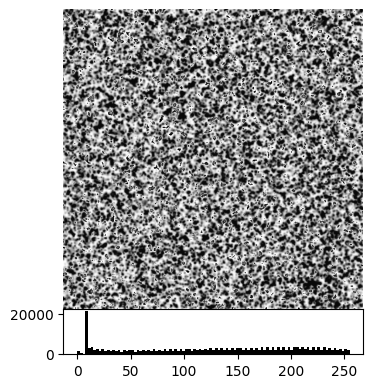

In [15]:
img_dif.plot()

#### Smoothing the image

<Axes: >

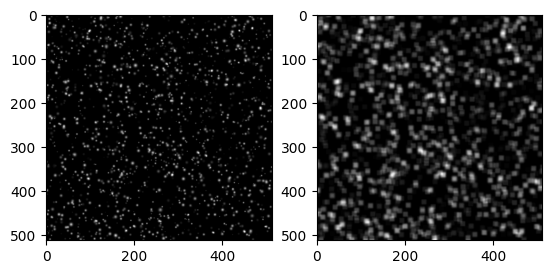

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
pimgs[-1].A.plot(ax=axs[0])
pimgs[-1].A.smooth(kernel_size=11).plot(ax=axs[1])

#### Rotating the image

To illustrate, that it works, we rotate the image and subtract it from the not-rotated one. Compare the above difference, how it looks different. The application is useless, however it shows, that rotating works :-)

(<Axes: >, <Axes: >)

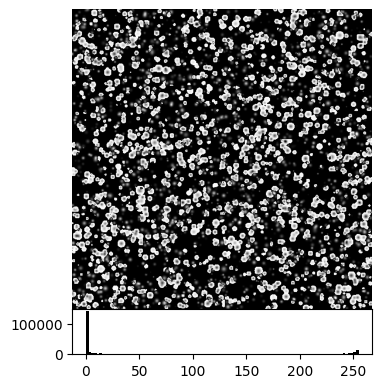

In [17]:
img = pimgs[-1].A
img_diff90 = img - img.rot90()
img_diff90.plot()

#### Normalize images

Normalize an image to range [0, 1]:

(<Axes: title={'center': 'A'}>, <Axes: >)

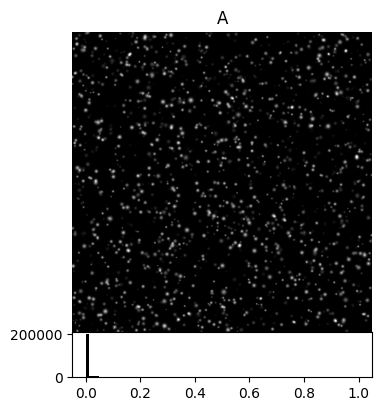

In [18]:
pimgs[-1].A.normalize().plot()